## Laboratorio # 2

In [1]:
#pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Problema #1

##### Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

In [2]:
import cv2
import numpy as np

In [28]:
def binariza_imagen(image_path, threshold=128):
    # Cargar la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Verificar si la imagen se cargó correctamente
    if image is None:
        print("Error al cargar la imagen.")
        return None
    
    # Aplicar la binarización
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    
    # Guardar la imagen binarizada
    output_path = 'binariza_imagen.png'
    cv2.imwrite(output_path, binary_image)
    
    print(f"Imagen binarizada guardada en {output_path}")
    return binary_image


In [19]:
# Aplica
binariza_imagen('imagen.jpg')

Imagen binarizada guardada en binariza_imagen.png


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Problema #2

##### Desarrolle una función que dada dos que usted desee del mismo tamaño (igual ancho y alto) y a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [31]:
# Cargar las imágenes y redimensionarlas al mismo tamaño
imagen1 = cv2.imread('imagen1.jpg')
imagen2 = cv2.imread('imagen2.jpg')

# Asegurarse de que ambas imágenes tengan el mismo tamaño
ancho = min(imagen1.shape[1], imagen2.shape[1])
alto = min(imagen1.shape[0], imagen2.shape[0])

imagen1 = cv2.resize(imagen1, (ancho, alto))
imagen2 = cv2.resize(imagen2, (ancho, alto))

# 2. Convertir las imágenes a escala de grises
imagen1_gris = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)
imagen2_gris = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)

# Binarizar las imágenes (umbral 127, valores de píxel 0 o 255)
_, imagen1_bin = cv2.threshold(imagen1_gris, 127, 255, cv2.THRESH_BINARY)
_, imagen2_bin = cv2.threshold(imagen2_gris, 127, 255, cv2.THRESH_BINARY)

# 3. Funciones para operaciones con las imágenes
def suma(imagen1, imagen2):
    return cv2.add(imagen1, imagen2)

def resta(imagen1, imagen2):
    return cv2.subtract(imagen1, imagen2)

def operacion_and(imagen1, imagen2):
    return cv2.bitwise_and(imagen1, imagen2)

def operacion_or(imagen1, imagen2):
    return cv2.bitwise_or(imagen1, imagen2)

def operacion_xor(imagen1, imagen2):
    return cv2.bitwise_xor(imagen1, imagen2)

# Aplicar operaciones a las imágenes binarizadas
resultado_suma = suma(imagen1_bin, imagen2_bin)
resultado_resta = resta(imagen1_bin, imagen2_bin)
resultado_and = operacion_and(imagen1_bin, imagen2_bin)
resultado_or = operacion_or(imagen1_bin, imagen2_bin)
resultado_xor = operacion_xor(imagen1_bin, imagen2_bin)

# Mostrar los resultados
cv2.imshow('Suma', resultado_suma)
cv2.imshow('Resta', resultado_resta)
cv2.imshow('AND', resultado_and)
cv2.imshow('OR', resultado_or)
cv2.imshow('XOR', resultado_xor)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Problema #3

#### Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

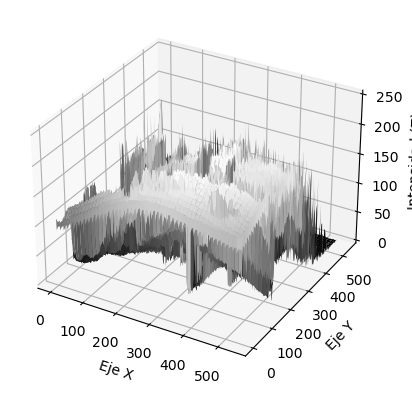

In [33]:
def mostrar_imagen_en_3d(imagen):
    # Obtener las dimensiones de la imagen
    alto, ancho = imagen.shape
    
    # Crear una malla de coordenadas X e Y
    x = np.arange(0, ancho)
    y = np.arange(0, alto)
    x, y = np.meshgrid(x, y)
    
    # Crear la figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar en 3D, donde Z es la intensidad de la imagen en cada punto
    ax.plot_surface(x, y, imagen, cmap='gray')
    
    # Etiquetas de los ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad (Z)')
    
    # Mostrar la gráfica
    plt.show()

# Cargar la imagen en escala de grises
imagen3 = cv2.imread('imagen3.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen en 3D
mostrar_imagen_en_3d(imagen3)

### Problema #4

#### Implemente una funcion para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

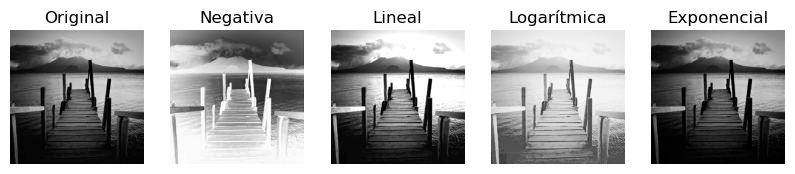

In [35]:
# Función para la transformación negativa
def transformacion_negativa(imagen):
    return 255 - imagen

# Función para la transformación lineal
def transformacion_lineal(imagen, alfa, beta):
    # alfa: factor de escala
    # beta: valor agregado a cada píxel
    return cv2.convertScaleAbs(imagen, alpha=alfa, beta=beta)

# Función para la transformación logarítmica
def transformacion_logaritmica(imagen, c):
    # c: constante de escala
    imagen_log = c * np.log1p(imagen)
    imagen_log = np.uint8(imagen_log / imagen_log.max() * 255)  # Normalizar
    return imagen_log

# Función para la transformación exponencial
def transformacion_exponencial(imagen, c, gamma):
    # c: constante de escala
    # gamma: exponente
    imagen_exp = c * np.power(imagen, gamma)
    imagen_exp = np.uint8(imagen_exp / imagen_exp.max() * 255)  # Normalizar
    return imagen_exp

# Función para mostrar imágenes
def mostrar_imagenes(imagenes, titulos):
    plt.figure(figsize=(10, 5))
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(1, len(imagenes), i+1)
        plt.imshow(img, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.show()

# Cargar la imagen en escala de grises
imagen = cv2.imread('imagen3.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar las transformaciones
imagen_negativa = transformacion_negativa(imagen)
imagen_lineal = transformacion_lineal(imagen, alfa=1.5, beta=0)
imagen_logaritmica = transformacion_logaritmica(imagen, c=30)
imagen_exponencial = transformacion_exponencial(imagen, c=1, gamma=1.2)

# Mostrar los resultados
imagenes = [imagen, imagen_negativa, imagen_lineal, imagen_logaritmica, imagen_exponencial]
titulos = ['Original', 'Negativa', 'Lineal', 'Logarítmica', 'Exponencial']
mostrar_imagenes(imagenes, titulos)

### Problema #5

#### Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de Canny para la deteccion de bordes.

Kernel Laplaciano:
El kernel Laplaciano es un operador de segundo orden utilizado para detectar bordes en imágenes. Este enfoque utiliza la segunda derivada de la imagen para identificar cambios abruptos en la intensidad de los píxeles, que son indicativos de bordes. El operador Laplaciano resalta regiones de la imagen donde la intensidad cambia rápidamente en todas las direcciones.

Características:
Realza los bordes: Detecta bordes en todas las direcciones, ya que la segunda derivada identifica puntos donde la intensidad cambia bruscamente.
No tiene dirección: A diferencia de operadores como Sobel o Prewitt, el Laplaciano no es direccional y detecta cambios en todas las direcciones de forma equivalente.
Susceptible a ruido: Dado que el Laplaciano opera sobre la segunda derivada, es más sensible al ruido en la imagen. Pequeñas fluctuaciones pueden generar falsos positivos como bordes.


Pasos del algoritmo de Canny:

Suavizado (Gaussian Blur): Reduce el ruido aplicando un filtro Gaussiano.
Cálculo de Gradiente: Utiliza operadores Sobel para calcular el gradiente de la imagen en las direcciones X e Y.

Supresión de no-máximos: Mantiene solo los píxeles que son máximos locales en la dirección del gradiente.

Umbral Doble: Utiliza dos umbrales para identificar bordes fuertes y débiles, conectando los débiles que están asociados con los fuertes.
Detección de Bordes: Se conectan los bordes débiles con los fuertes para formar bordes continuos.

Características:
Menos susceptible al ruido: La etapa de suavizado reduce la sensibilidad al ruido.
Direccional: Detecta bordes con orientación específica.
Bordes conectados: El algoritmo asegura que los bordes detectados sean continuos y menos fragmentados.

Diferencias Principales:

Enfoque: El Laplaciano se basa en la segunda derivada y detecta bordes sin considerar la dirección, mientras que Canny utiliza un enfoque de gradiente direccional y sigue una serie de pasos para una detección más precisa y robusta.

Sensibilidad al Ruido: Canny es menos susceptible al ruido debido al suavizado inicial, mientras que el Laplaciano puede amplificar el ruido, generando bordes falsos.

Complejidad: Canny es más complejo y computacionalmente intensivo debido a los múltiples pasos involucrados, pero ofrece resultados más refinados.

Aplicaciones: El Laplaciano es más adecuado para aplicaciones rápidas y donde la dirección del borde no es crucial. Canny se usa cuando se necesita precisión y bordes bien definidos.
